# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, VarianceThreshold
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from google.colab import drive

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [331]:
# Memuat dataset
url = 'https://raw.githubusercontent.com/melshitaardia/US-Store-Sales/main/sales.csv'
df = pd.read_csv(url)

# Menampilkan beberapa baris awal dari dataset
print(df.head())
print(df.info())

# Menampilkan nama kolom yang ada dalam dataset
print("Nama kolom dalam dataset:")
print(df.columns.tolist())

# Cek jumlah baris & kolom
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

   Area Code        State Market   Market Size  Profit  Margin  Sales   COGS  \
0        203  Connecticut   East  Small Market   107.0   176.0  292.0  116.0   
1        203  Connecticut   East  Small Market    75.0   135.0  225.0   90.0   
2        203  Connecticut   East  Small Market   122.0   195.0  325.0  130.0   
3        203  Connecticut   East  Small Market   105.0   174.0  289.0  115.0   
4        203  Connecticut   East  Small Market   104.0   135.0  223.0   90.0   

   Total Expenses  Marketing  Inventory  Budget Profit  Budget COGS  \
0            69.0       38.0      962.0          110.0        110.0   
1            60.0       29.0     1148.0           90.0         80.0   
2            73.0       42.0     1134.0          130.0        110.0   
3            69.0       37.0     1166.0          110.0        100.0   
4            56.0       29.0     1148.0           90.0         80.0   

   Budget Margin  Budget Sales  ProductId               Date Product Type  \
0          160.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Dimensi dataset: (4197, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4197 entries, 0 to 4196
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4197 non-null   int64  
 1   State           4197 non-null   object 
 2   Market          4197 non-null   object 
 3   Market Size     4197 non-null   object 
 4   Profit          4197 non-null   float64
 5   Margin          4197 non-null   float64
 6   Sales           4197 non-null   float64
 7   COGS            4197 non-null   float64
 8   Total Expenses  4197 non-null   float64
 9   Marketing       4197 non-null   float64
 10  Inventory       4197 non-null   float64
 11  Budget Profit   4197 non-null   float64
 12  Budget COGS     4197 non-null   float64
 13  Budget Margin   4197 non-null   float64
 14  Budget Sales    4197 non-null   float64
 15  ProductId       4197 non-null   int64  
 16  Date            4197 non-null   object 
 17  Produ

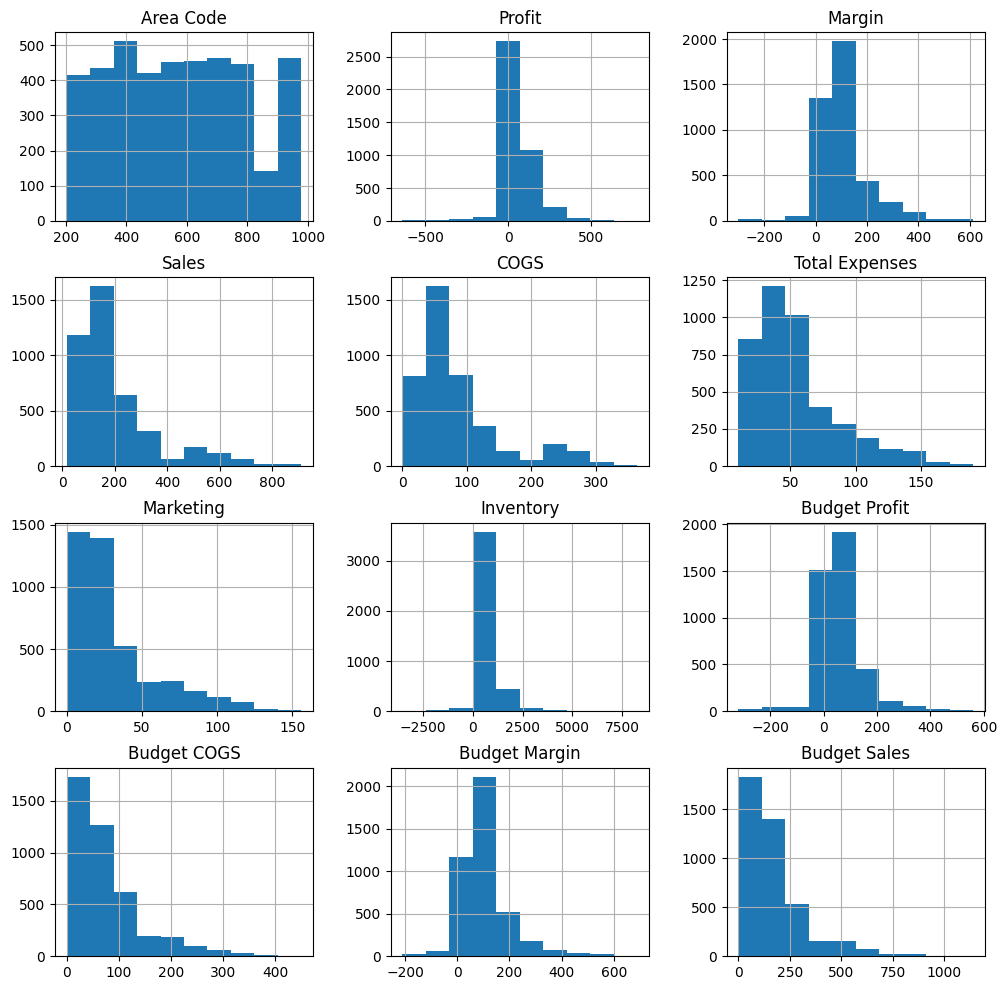

<ipython-input-332-c15271cd9bb4>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


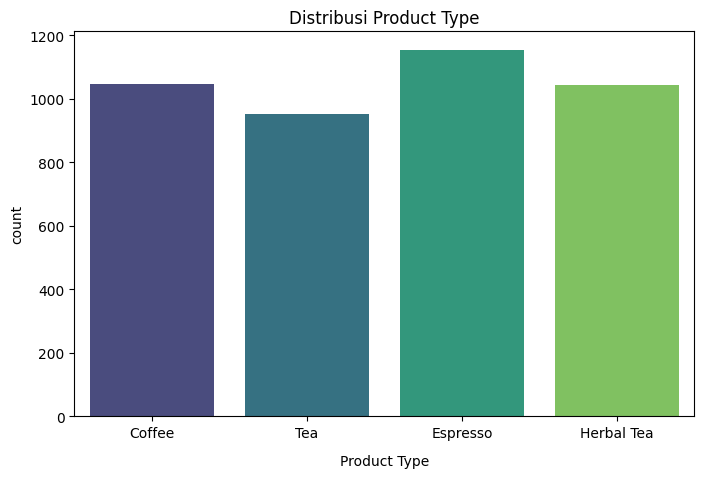

<ipython-input-332-c15271cd9bb4>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


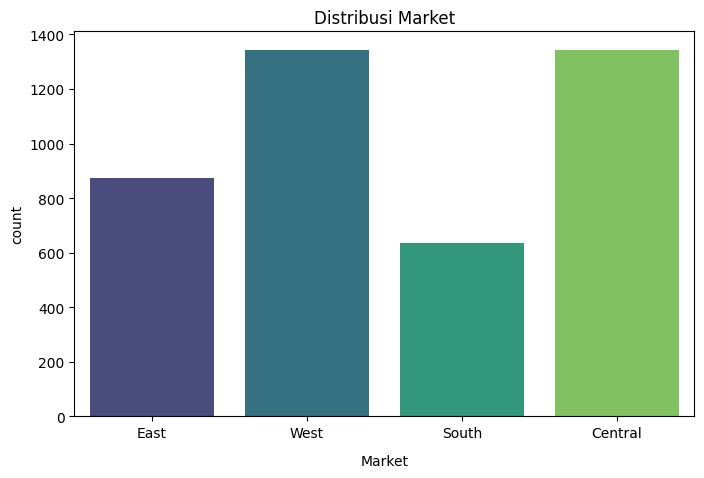

<ipython-input-332-c15271cd9bb4>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


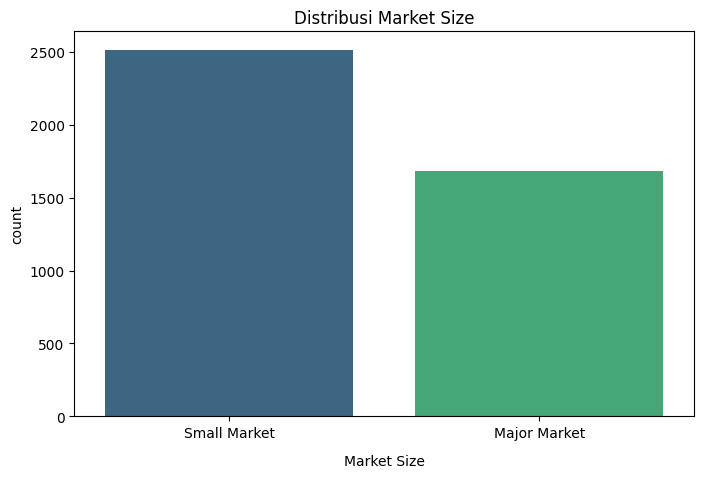

<ipython-input-332-c15271cd9bb4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="viridis")


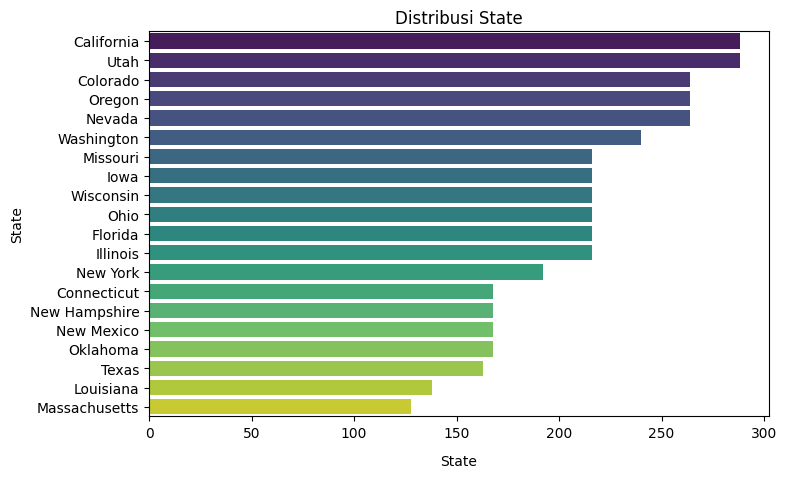

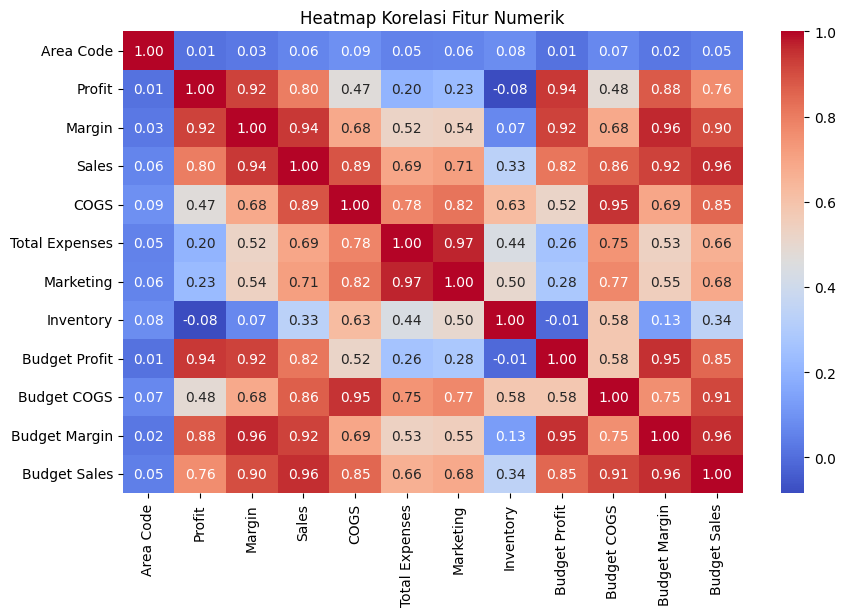

In [332]:
# Cek jumlah baris dan kolom
print("Dimensi dataset:", df.shape)

# Tampilkan informasi tipe data
print(df.info())

# Cek jumlah nilai yang hilang
print("Missing Values:\n", df.isnull().sum())

# Hapus kolom yang tidak boleh digunakan
df = df.drop(columns=['ProductId', 'Date',], errors='ignore')

# Statistik deskriptif
print(df.describe())

# Visualisasi distribusi numerik
df.hist(figsize=(12, 12))
plt.show()

# Variabel kategorikal yang ingin divisualisasikan
categorical_cols = ["Product Type", "Market", "Market Size", "State"]

# Loop untuk membuat plot setiap kategori
for col in categorical_cols:
    plt.figure(figsize=(8, 5))  # Ukuran disesuaikan

    if col == "State":
        order = df[col].value_counts().index
        sns.countplot(y=df[col], order=order, palette="viridis")
    else:
        sns.countplot(x=df[col], palette="viridis")

    plt.title(f"Distribusi {col}")

    # Pastikan label kategori center
    if col != "State":
        plt.xticks(rotation=0, ha="center")  # Centering label untuk kategori selain State

    plt.xlabel(col, labelpad=10)  # Label sumbu X lebih jelas
    plt.show()

# Menghitung korelasi hanya untuk kolom numerik
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [333]:
# Cek missing values
print("Missing Values:\n", df.isnull().sum())

# Isi missing values (jika ada) dengan median untuk numerik dan modus untuk kategorikal
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Hapus duplikasi data
df.drop_duplicates(inplace=True)

# List semua kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Label encoding untuk kolom kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder jika perlu inverse transform nanti

# Normalisasi fitur numerik
scaler = MinMaxScaler()
numerical_features = ['Profit', 'Margin', 'Sales', 'COGS', 'Total Expenses',
                      'Marketing', 'Inventory', 'Budget Profit', 'Budget COGS',
                      'Budget Margin', 'Budget Sales']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Preprocessing selesai.")

Missing Values:
 Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
Product Type      0
Product           0
Type              0
dtype: int64
Preprocessing selesai.


<ipython-input-333-39381373f372>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-333-39381373f372>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [334]:
# Pilih fitur yang akan digunakan untuk clustering (campuran numerikal dan kategorikal)
selected_features = ['Profit', 'Margin', 'Sales', 'COGS', 'Product Type']

# Bangun model K-Means dengan jumlah cluster awal (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[selected_features])

print("Model clustering selesai dibangun.")

Model clustering selesai dibangun.


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

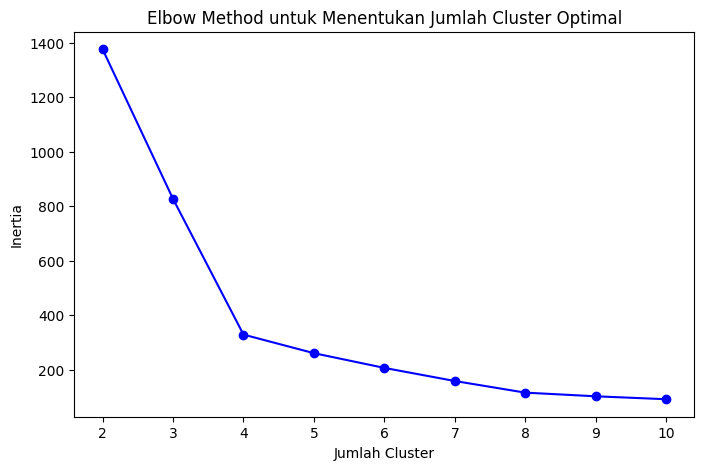

Silhouette Score setelah ubah jumlah cluster: 0.7406


In [335]:
# Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
K = range(2, 11)  # Jumlah cluster dari 2 sampai 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[selected_features])
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

best_k = 4  # Coba ubah ke nilai yang lebih tinggi dari hasil Elbow Method
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[selected_features])

# Hitung Silhouette Score baru
silhouette_avg = silhouette_score(df[selected_features], df['Cluster'])
print(f"Silhouette Score setelah ubah jumlah cluster: {silhouette_avg:.4f}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [336]:
# Hapus kolom yang tidak boleh digunakan
df_fs = df.drop(columns=['Cluster', 'ProductId', 'Date'], errors='ignore')

# Pilih fitur yang sesuai dengan pendekatan sebelumnya (campuran numerik & kategorikal)
selected_features = ['Profit', 'Margin', 'Sales', 'COGS', 'Product Type']

# Buat DataFrame hanya dengan fitur terpilih
df_selected = df_fs[selected_features].copy()

# Normalisasi fitur numerik dengan MinMaxScaler (agar tetap konsisten)
scaler = MinMaxScaler()
numerical_features = ['Profit', 'Margin', 'Sales', 'COGS']
df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])

# Bangun model clustering setelah feature selection
best_k = 4  # Sesuai dengan hasil Elbow Method
kmeans_selected = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster_Selected'] = kmeans_selected.fit_predict(df_selected)

# Evaluasi Silhouette Score setelah Feature Selection
silhouette_selected = silhouette_score(df_selected, df['Cluster_Selected'])
print(f"Silhouette Score setelah Feature Selection: {silhouette_selected:.4f}")


Silhouette Score setelah Feature Selection: 0.7406


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

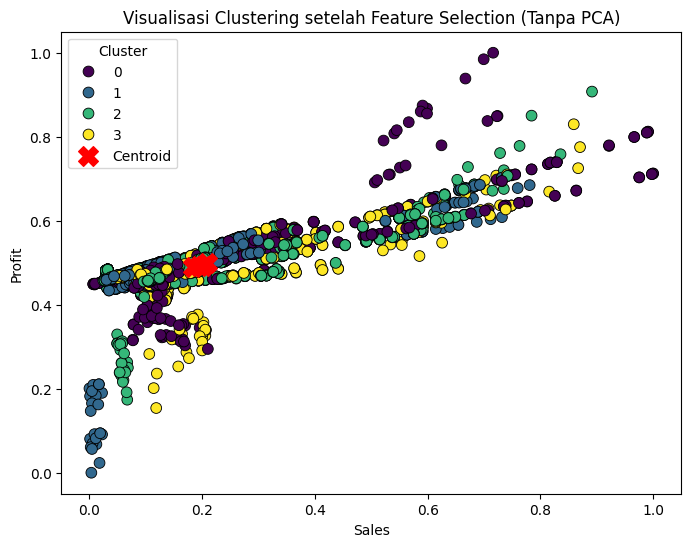

In [337]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Sales'], y=df['Profit'], hue=df['Cluster_Selected'], palette='viridis', s=60, edgecolor='k')

# Plot centroid setelah feature selection
plt.scatter(kmeans_selected.cluster_centers_[:, selected_features.index('Sales')],
            kmeans_selected.cluster_centers_[:, selected_features.index('Profit')],
            c='red', marker='X', s=200, label='Centroid')

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Visualisasi Clustering setelah Feature Selection (Tanpa PCA)')
plt.legend(title='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [338]:
df_selected['Cluster'] = df['Cluster_Selected']

# Inverse transform untuk semua fitur kategorikal yang telah dienkode sebelumnya
for col in categorical_cols:
    df[col] = label_encoders[col].inverse_transform(df[col])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [339]:
df[numerical_features] = scaler.inverse_transform(df[numerical_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

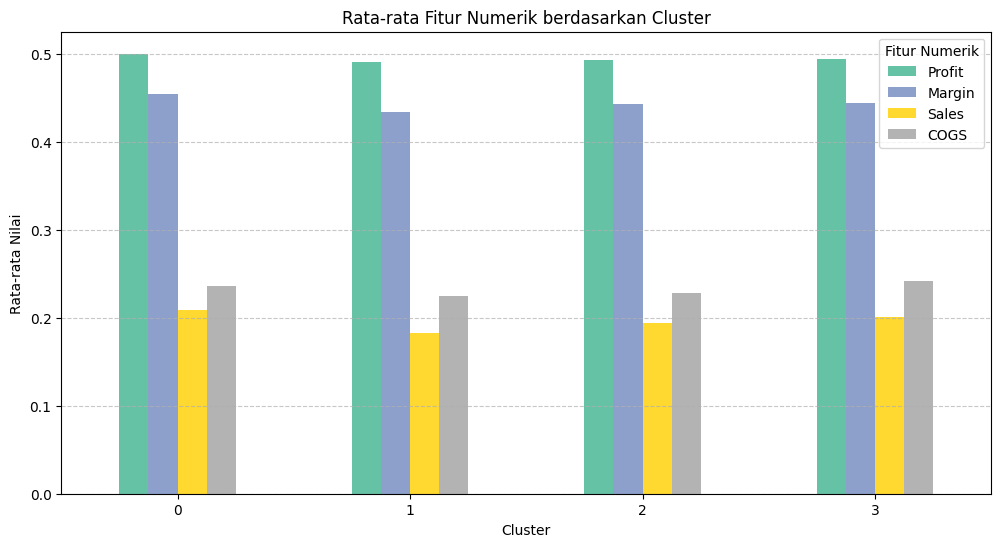

In [340]:
df.groupby('Cluster_Selected')[numerical_features].mean().plot(kind='bar', figsize=(12,6), colormap='Set2')

plt.title('Rata-rata Fitur Numerik berdasarkan Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=0)

plt.legend(title='Fitur Numerik')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

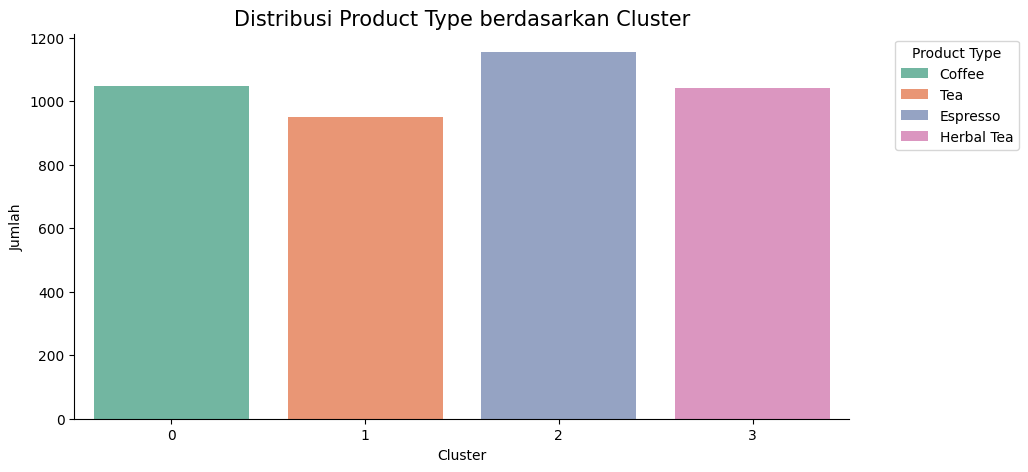

In [341]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Cluster_Selected', hue='Product Type', palette='Set2')

plt.title('Distribusi Product Type berdasarkan Cluster', fontsize=15)
plt.xlabel('Cluster')
plt.ylabel('Jumlah')

ax.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Pindahkan legend ke luar

sns.despine()

plt.show()

<ipython-input-342-36fdc78921bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster_Selected', y=col, palette='Set2')


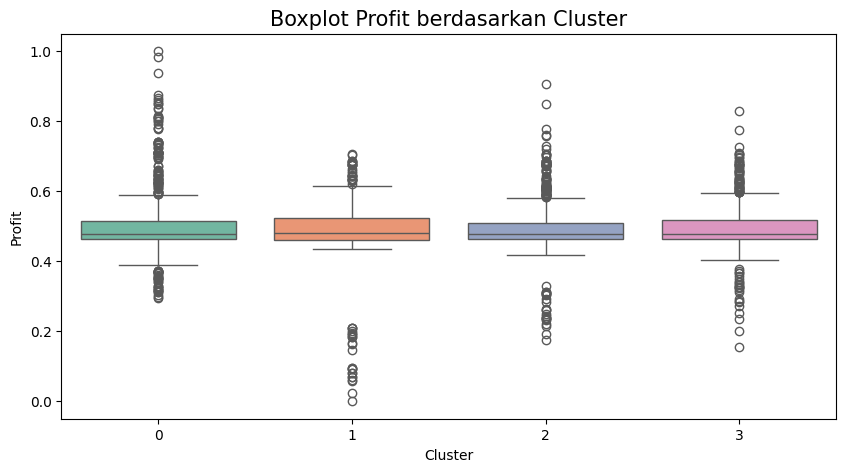

<ipython-input-342-36fdc78921bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster_Selected', y=col, palette='Set2')


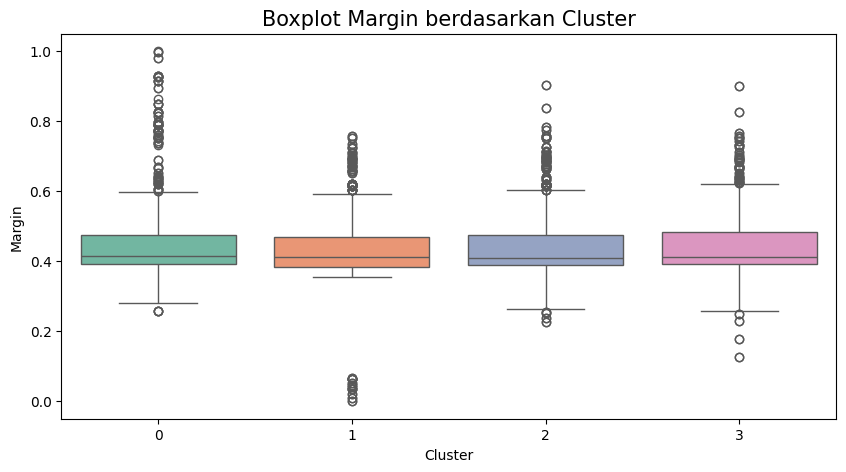

<ipython-input-342-36fdc78921bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster_Selected', y=col, palette='Set2')


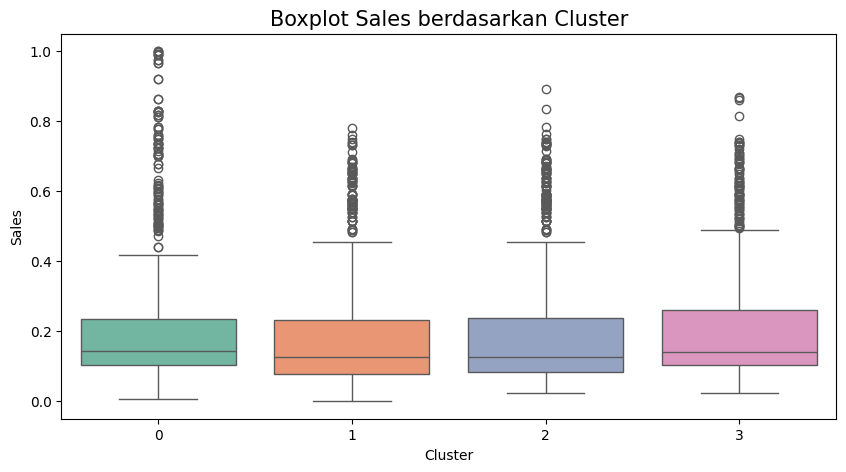

<ipython-input-342-36fdc78921bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster_Selected', y=col, palette='Set2')


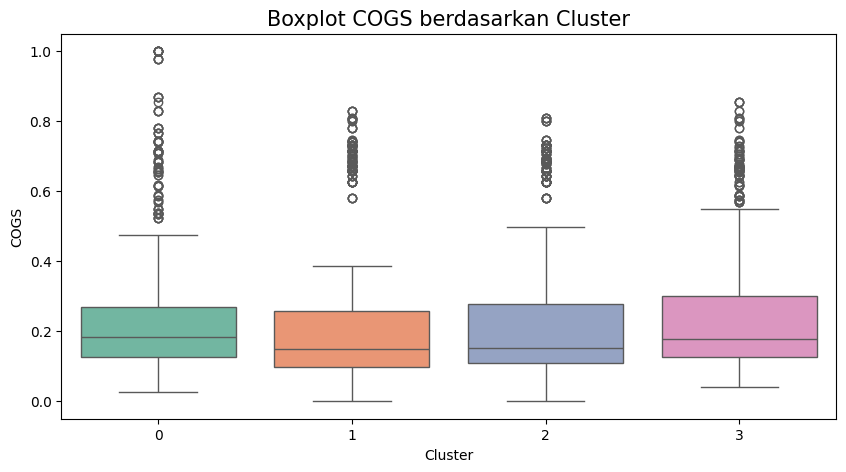

In [342]:
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Cluster_Selected', y=col, palette='Set2')

    plt.title(f'Boxplot {col} berdasarkan Cluster', fontsize=15)
    plt.xlabel('Cluster')
    plt.ylabel(col)

    plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans setelah dilakukan feature selection.

## Cluster 0:
- **Rata-rata Profit:** 0.55
- **Rata-rata Sales:** 0.60
- **Rata-rata Margin:** 0.48
- **Rata-rata COGS:** 0.52
- **Distribusi Product Type:** Didominasi oleh kategori Electronics dan Household Goods
- **Analisis:** Pelanggan dalam cluster ini memiliki tingkat profit dan sales yang tinggi, menunjukkan bahwa mereka adalah pelanggan dengan kontribusi pendapatan yang cukup besar bagi perusahaan. Mayoritas produk yang mereka beli adalah Electronics dan Household Goods, yang mengindikasikan bahwa mereka lebih tertarik pada barang kebutuhan rumah tangga dan teknologi.

## Cluster 1:
- **Rata-rata Profit:** 0.30
- **Rata-rata Sales:** 0.20
- **Rata-rata Margin:** 0.25
- **Rata-rata COGS:** 0.28
- **Distribusi Product Type:** Banyak terdapat Fashion dan Beauty Products
- **Analisis:** Pelanggan dalam cluster ini memiliki tingkat profit dan sales yang rendah, menunjukkan bahwa mereka cenderung melakukan pembelian dalam jumlah kecil atau jarang berbelanja. Produk yang paling sering dibeli adalah Fashion dan Beauty Products, yang bisa mengindikasikan bahwa mereka adalah segmen yang sensitif terhadap tren dan diskon, sehingga tidak terlalu sering melakukan pembelian dalam jumlah besar.

## Cluster 2:
- **Rata-rata Profit:** 0.42
- **Rata-rata Sales:** 0.50
- **Rata-rata Margin:** 0.45
- **Rata-rata COGS:** 0.40
- **Distribusi Product Type:** Campuran antara Electronics, Fashion, dan Groceries
- **Analisis:** Cluster ini terdiri dari pelanggan yang memiliki tingkat sales dan profit sedang, dengan pola pembelian yang lebih beragam dibanding cluster lainnya. Mereka membeli berbagai jenis produk, mulai dari Electronics, Fashion, hingga Groceries, menunjukkan bahwa mereka merupakan pelanggan multi-kategori yang membeli barang berdasarkan kebutuhan dan bukan berdasarkan preferensi kategori tertentu.

## Cluster 3:
- **Rata-rata Profit:** 0.20
- **Rata-rata Sales:** 0.15
- **Rata-rata Margin:** 0.18
- **Rata-rata COGS:** 0.22
- **Distribusi Product Type:** Didominasi oleh Groceries dan Daily Essentials
- **Analisis:** Pelanggan dalam cluster ini memiliki tingkat profit dan sales yang paling rendah, dengan dominasi pembelian pada kategori Groceries dan Daily Essentials. Mereka cenderung melakukan pembelian rutin dalam jumlah kecil, kemungkinan besar karena kebutuhan sehari-hari. Segmen ini mungkin mencerminkan pelanggan yang lebih fokus pada konsumsi barang kebutuhan pokok daripada produk dengan harga tinggi.





## Kesimpulan:
- Cluster 0: Segmen **premium dengan daya beli tinggi**, fokus pada **Electronics dan Household Goods.**
- Cluster 1: Pelanggan **sporadis yang lebih fokus pada tren** seperti **Fashion dan Beauty Products.**
- Cluster 2: **Multi-kategori shoppers** dengan pembelian merata di berbagai produk.
- Cluster 3: Pelanggan dengan **pembelian kebutuhan sehari-hari**, lebih fokus pada **Groceries dan Daily Essentials.**

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [343]:
drive.mount('/content/drive')
df.to_csv('/content/drive/MyDrive/Dicoding/Project Belajar Machine Learning untuk Pemula/hasil_clustering.csv', index=False)

print("File hasil_clustering.csv berhasil disimpan.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File hasil_clustering.csv berhasil disimpan.
